# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
random=np.random.random((100,10))
np.savetxt('simple_data.txt', random)

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
matrix=np.random.rand(5,5)
np.savetxt('data.txt', matrix)

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [17]:
str(matrix[2][2]).

<function str.removesuffix(suffix, /)>

In [38]:
matrix=np.loadtxt('data.txt')
file = open('data.csv', 'w')    
for i in range(matrix.shape[0]):
    stringa=""
    for j in range(matrix.shape[1]):
        stringa+=str(matrix[i][j])+","
    stringa+="\n"
    file.write(stringa)
file.close()


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [83]:
int("bin")

TypeError: an integer is required (got type str)

In [87]:
input = open("credit_card.dat", "r")
with open("credit_card2.txt", "w") as output:
    for line in input:
        for i in range(0, len(line)-10, 6): output.write(chr(int(line[i : i + 6],2)))            
        output.write("\n")
input.close()
output.close()

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Then save the data to a CSV.


In [99]:
import json
df=pd.DataFrame( json.load(open('user_data.json')))
df=df[df["CreditCardType"]=="American Express"]
df.to_csv("AmericanExpress.csv")

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


In [102]:
import pandas as pd
url="https://www.dropbox.com/s/dl/7u3lm737ogbqsg8/mushrooms_categorized.csv"
df=pd.read_csv(url)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [103]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

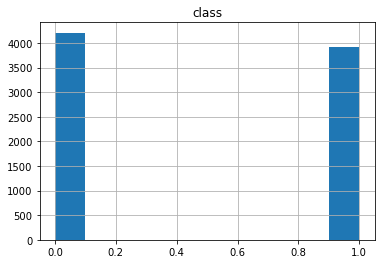

In [104]:
df.hist("class")

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://www.dropbox.com/s/dl/vkl89yce7xjdq4n/regression_generated.csv"
df=pd.read_csv(url)
df

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


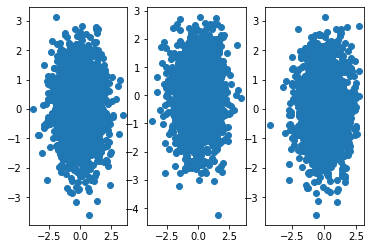

In [7]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3)
ax0.scatter(df["features_1"],df["features_2"])
ax1.scatter(df["features_1"],df["features_3"])
ax2.scatter(df["features_3"],df["features_2"])


8\. Load the same file of point 6, and convert the file to json with Pandas.

In [9]:
import pandas as pd
url="https://www.dropbox.com/s/dl/7u3lm737ogbqsg8/mushrooms_categorized.csv"
df=pd.read_csv(url)
df.to_json("mushrooms_categorized.json")